--------------------------
#### Querying Our Data - Part 1 – Context Retrieval
---------------------------------------

#### Understanding the basic retrievers

- Retrieval mechanisms are essential in any RAG (Retrieval-Augmented Generation) system.
- While retrievers operate differently, they follow the same core principle: browsing through an index to select relevant nodes that provide necessary context. 

- Each index type supports `several retrieval modes`, offering various features and customization options.
- Despite the retriever type, the result is returned as a `NodeWithScore object`, which combines a node with an associated score. This score can help sort nodes by relevance further in the RAG process. 
- However, note that not all retrievers assign a specific score to a node, although they all return a NodeWithScore object.

- LlamaIndex provides `multiple ways to build a retriever`, the simplest being direct construction from an Index object. 
- Assuming document ingestion is already handled, the following code  shows how to create an index and then build a retriever based on that index's structure

In [1]:
from llama_index.core import SummaryIndex, SimpleDirectoryReader
from llama_index.core.retrievers import SummaryIndexEmbeddingRetriever


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\ANACONDA\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "D:\ANACONDA\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "D:\ANACONDA\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "D:\ANACONDA\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

`SimpleDirectoryReader`: 
- This class reads documents stored in a specified directory. It loads data from files in a simple, structured manner.

In [2]:
documents = SimpleDirectoryReader("files").load_data()

`SummaryIndex`: 

- This is a class from the llama_index library used to create an index from a set of documents. A "summary index" allows you to retrieve summarized information from the documents.

In [3]:
summary_index = SummaryIndex.from_documents(documents)

`SummaryIndexEmbeddingRetriever`: 

- A retriever that retrieves information `using embeddings` based on the SummaryIndex. Embeddings capture semantic meaning, allowing for more relevant retrieval based on the query.

In [5]:
retriever = SummaryIndexEmbeddingRetriever(
    index = summary_index
)

`SummaryIndexRetriever` - This is the default retriever for this index.

In [8]:
result = retriever.retrieve("Tell me about ancient Rome in 15 words")
print(result[0].text)

In ancient Rome, the city of Rome itself was the heart of the vast Roman Empire. It was known for its grand architecture, including iconic structures like the Colosseum and the Pantheon. The Romans were skilled engineers and builders, creating an extensive network of roads, aqueducts, and bridges that connected their far-reaching territories. The Roman Republic, with its Senate and elected officials, gave rise to the famous Roman legions, which conquered vast lands and brought them under Roman rule. The Roman civilization's influence on art, law, and governance can still be seen in modern societies today.


In [9]:
result = retriever.retrieve("what skills Romans possessed?")
print(result[0].text)

In ancient Rome, the city of Rome itself was the heart of the vast Roman Empire. It was known for its grand architecture, including iconic structures like the Colosseum and the Pantheon. The Romans were skilled engineers and builders, creating an extensive network of roads, aqueducts, and bridges that connected their far-reaching territories. The Roman Republic, with its Senate and elected officials, gave rise to the famous Roman legions, which conquered vast lands and brought them under Roman rule. The Roman civilization's influence on art, law, and governance can still be seen in modern societies today.


#### Another way ...

In [10]:
from llama_index.core import SummaryIndex, SimpleDirectoryReader
from llama_index.core.retrievers import SummaryIndexEmbeddingRetriever

In [11]:
documents = SimpleDirectoryReader("files").load_data()

In [12]:
summary_index = SummaryIndex.from_documents(documents)

In [13]:
retriever = SummaryIndexEmbeddingRetriever(
        index=summary_index
)

In [14]:
result = retriever.retrieve("Tell me about ancient Rome")
print(result[0].text)

In ancient Rome, the city of Rome itself was the heart of the vast Roman Empire. It was known for its grand architecture, including iconic structures like the Colosseum and the Pantheon. The Romans were skilled engineers and builders, creating an extensive network of roads, aqueducts, and bridges that connected their far-reaching territories. The Roman Republic, with its Senate and elected officials, gave rise to the famous Roman legions, which conquered vast lands and brought them under Roman rule. The Roman civilization's influence on art, law, and governance can still be seen in modern societies today.



----------------------------------
#### VectorStoreIndex retrievers

---------------------------------------

- We have two retriever options available for this index.

#### 1.VectorIndexRetriever

- The default retriever used by `VectorStoreIndex` is `VectorIndexRetriever`.


`VectorStoreIndex` is one of the most sophisticated and widely used indexes. Its associated retriever, `VectorIndexRetriever`, is equally complex, offering advanced 
capabilities for retrieving relevant documents based on vector embeddings.

This allows for highly accurate and efficient information retrieval, especially in cases where semantic similarity plays a critical role.

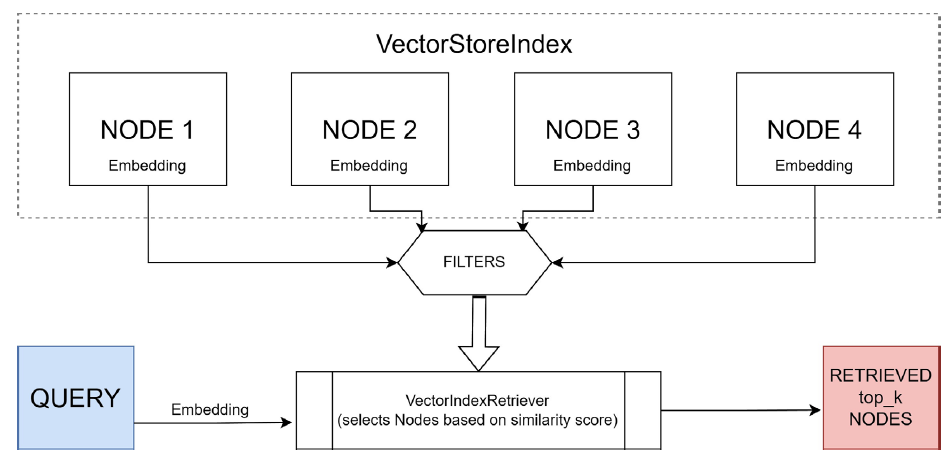

#### How the Retriever Operates

- Converts queries into vectors and performs similarity-based searches in the vector space.

#### Customizable Parameters

- **similarity_top_k**:
  - Defines the number of top (k) results returned by the retriever.
  - Default is 2 but can be increased for broader searches.

- **vector_store_query_mode**:
  - Sets the query mode for the vector store.
  - Works with external stores like Pinecone (https://www.pinecone.io/) and OpenSearch (https://opensearch.org/).
  - Helps optimize the retrieval process based on specific vector store capabilities.

- **filters**:
  - Uses metadata attached to nodes to narrow down the search.
  - Allows customized searches based on specific criteria.

- **alpha**:
  - Relevant in hybrid search modes (combining sparse and dense search).
  - Manages the balance between sparse and dense search results.

- **sparse_top_k**:
  - Number of top results returned in sparse search.
  - Primarily used in hybrid search modes.

- **doc_ids**:
  - Restricts search to a subset of documents based on document IDs.
  - Useful for partitioning searches, like limiting queries to specific departments in an organization.

- **node_ids**:
  - Similar to `doc_ids`, but focuses on node IDs within the index for finer control over search results.

- **vector_store_kwargs**:
  - Passes additional arguments specific to the vector store at query time.

#### Security Considerations

- **Security in RAG Applications**:
  - Security should be integrated early in the application lifecycle, including in the RAG retrieval process.
  - Filtering sensitive information as early as possible (e.g., during retrieval) reduces risks.
  - Minimizing data sent for processing also helps reduce costs, especially when processing through LLMs.


#### 2. VectorIndexAutoRetriever

#### VectorIndexRetriever Parameters

- **Usefulness**:
  - Parameters like `similarity_top_k`, `filters`, `doc_ids`, and `node_ids` are helpful when we know exactly what we're looking for and understand the data structure well.

#### Challenges with Complex or Ambiguous Data

- **Complex Structures & Ambiguities**:
  - In some cases, the indexed data may be complex or ambiguous, making it difficult to define clear queries using standard retrieval methods.

#### Introducing VectorIndexAutoRetriever

- **Advanced Retriever**:
  - The `VectorIndexAutoRetriever` is a more advanced retriever that leverages an LLM (Large Language Model) to automatically set query parameters for the vector store.
  
- **Natural Language Querying**:
  - It accepts natural language descriptions and relevant metadata to automatically adjust the search, making it more user-friendly for those unfamiliar with the data structure.

- **Transforming Vague Queries**:
  - This retriever can transform vague or unclear queries into more structured and efficient searches, maximizing the vector store's capabilities.

#### Use Case

- **Increased Success for Complex Queries**:
  - Particularly useful when users don't know how to formulate an effective query, helping to retrieve relevant results even in cases of data complexity or ambiguity.


https://docs.llamaindex.ai/en/stable/examples/vector_stores/elasticsearch_auto_retriever.html.

--------------------------------

#### SummaryIndex retrievers

- There are three retriever options available for this index.

----------------------

**1. SummaryIndexRetriever**

- This is the default retriever for SummaryIndex.
- it returns all nodes in the index without applying any filtering or sorting:

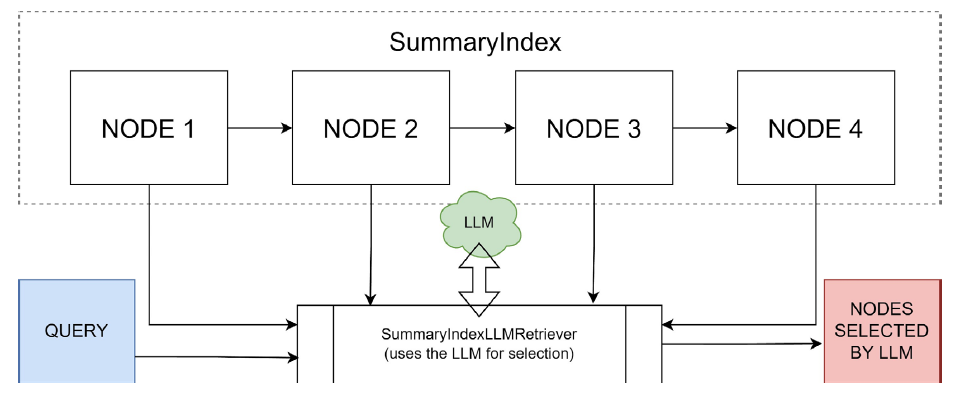

This is useful when we want to get a complete view of the data in the index, without having to filter
or sort the results. No relevance score is returned for the nodes.

**2. SummaryIndexEmbeddingRetriever**

- This retriever relies on embeddings to retrieve nodes from SummaryIndex. While SummaryIndex itself stores nodes in plain text, this retriever uses an embedding model to convert these plain text nodes into embeddings when a query is made.

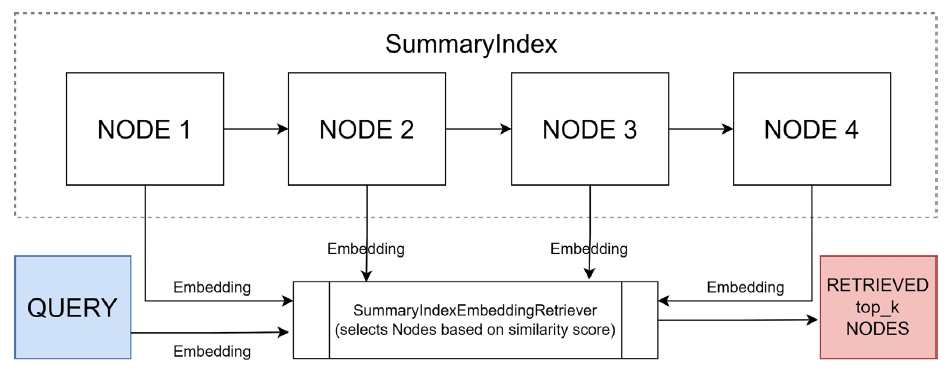

#### Dynamic Embedding Creation

- **Embeddings on Demand**:
  - Embeddings are created dynamically when needed for retrieval, rather than being stored persistently with the index.

#### similarity_top_k Parameter

- **Number of Results**:
  - Controls how many nodes are returned based on their similarity to the query.

#### Relevance-Based Retrieval

- **Similarity Computation**:
  - The retriever computes the similarity between the query and nodes, helping identify the most relevant nodes.

#### NodeWithScore Object

- **Similarity Score**:
  - For each node, a similarity score (based on embeddings) is calculated and returned.
  - The result is a `NodeWithScore` object, where the score reflects how well each node matches the query.


**3. SummaryIndexLLMRetriever**

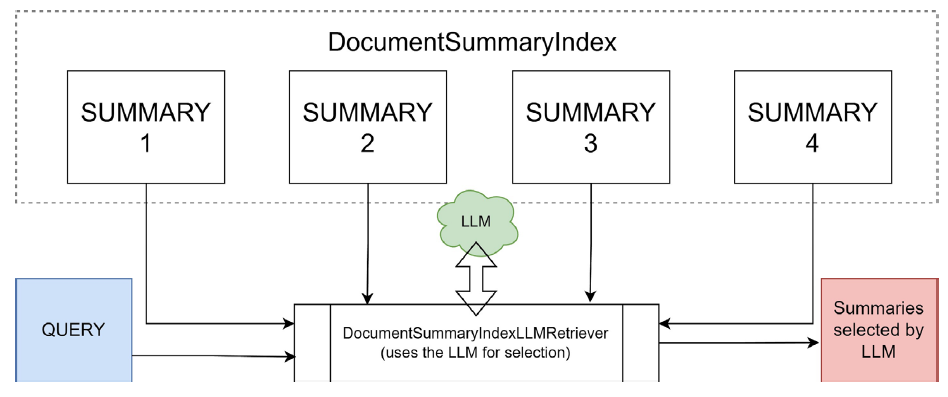

----------------------------
#### retrievers for DocumentSummaryIndex
------------------------------

- For this index, we only have two retrieval options

**1. DocumentSummaryIndexLLMRetriever**

- This retriever uses an LLM to select relevant summaries from an index of document summaries.

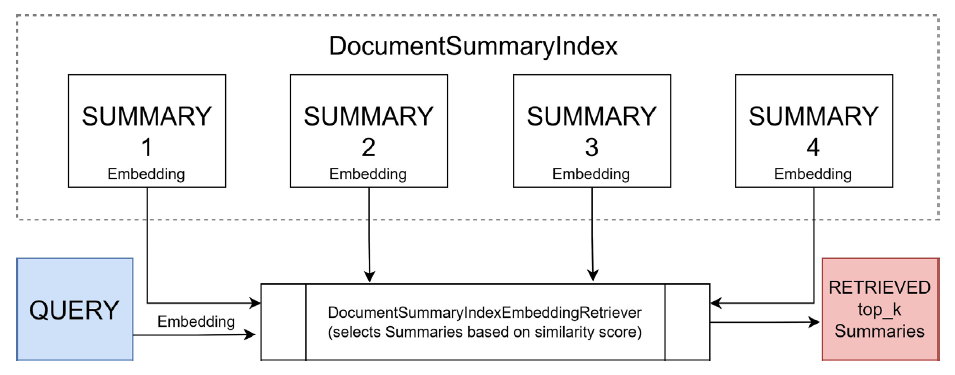

#### Batch Query Processing

- **Query Processing in Batches**:
  - The retriever processes queries in batches, with each batch containing a specific number of nodes sent to the LLM for evaluation.

#### Key Parameters

- **choice_batch_size**:
  - Defines the number of nodes in each batch sent to the LLM for evaluation.
  
- **choice_select_prompt**:
  - Custom prompt provided to the LLM to determine the relevance of the nodes to the query.

- **choice_top_k**:
  - Specifies how many top relevant results should be returned after sorting by relevance.

#### Customizable Functions

- **format_node_batch_fn**:
  - Prepares node information in a format suitable for the LLM.
  - May involve combining text, structuring data, or adding context for better LLM understanding.

- **parse_choice_select_answer_fn**:
  - Extracts relevance scores or other metrics from the LLM’s response.
  - Determines which nodes are most relevant to the query based on the LLM's evaluation.

#### DocumentSummaryIndexLLMRetriever

- **LLM-Powered Retrieval**:
  - Useful for retrieving relevant information from a large set of documents using LLMs' natural language processing capabilities.

#### Relevance Score

- **Score Returned**:
  - This retriever returns the relevance score for each node, helping to rank nodes by their alignment with the query.


**2. DocumentSummaryIndexEmbeddingRetriever**